<a href="https://colab.research.google.com/github/aquapathos/openCVLesson/blob/master/%E8%86%A8%E5%BC%B5%E3%83%BB%E5%8F%8E%E7%B8%AE%E5%87%A6%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving cross1.jpg to cross1.jpg


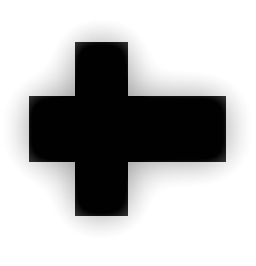

図A-1　cross.jpg


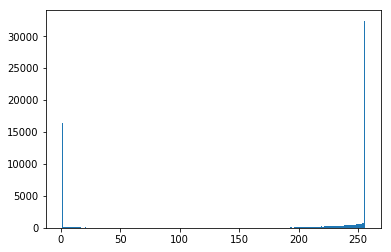

図A-2　coss.jpg のヒストグラム


In [1]:
import urllib.request
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files
filename = list(files.upload())[0]
img = cv2.imread(filename,1) # カラーで読み込み
gry = cv2.imread(filename,0) # グレイで読み込み
cv2_imshow(img)
print("図A-1　cross.jpg")
hist = cv2.calcHist([gry],[0],None,[256],[0,256])
plt.hist(gry.ravel(),256,[0,256]); plt.show()
print("図A-2　coss.jpg のヒストグラム")

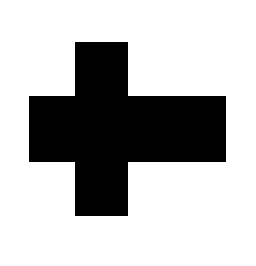

図A-3　coss.jpg を判別分析法によるしきい値 52.0 で２階調化した画像


In [2]:
# ２階調化
ret, bw = cv2.threshold(gry,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2_imshow(bw)
print("図A-3　coss.jpg を判別分析法によるしきい値 {} で２階調化した画像".format(ret))

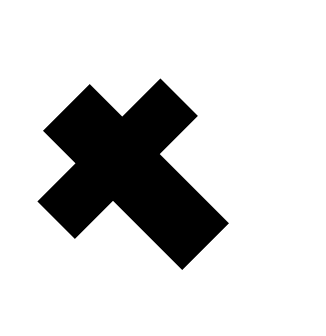

図A-4　45度回転した画像


In [3]:
# 画像の高さと幅
height = bw.shape[0]                         
width = bw.shape[1]  
# 中心                          
center = (int(width/2)+5, int(height/2)+5)

# 回転角
angle = -45.0
# スケール
scale = 1.0
# 余白をつける
img2 = np.zeros((height+70,height+70))
img2[35:35+height,35:35+width] = 255-bw
bw2 = 255-img2.copy()
# getRotationMatrix2D関数を使用
rmatrix = cv2.getRotationMatrix2D(center, angle , scale)
#アフィン変換
img2 = 255-cv2.warpAffine(img2, rmatrix, (width+70,height+70))
cv2_imshow(img2)
print("図A-4　45度回転した画像")

# 膨張処理

収縮はErosion，膨張はDilationであるが，opencv では，図が白，地が黒である前提のネーミングとなっている．
ここでは図が黒，地が白であるので，膨張と収縮が逆になることに注意せよ．


## ８近傍の膨張


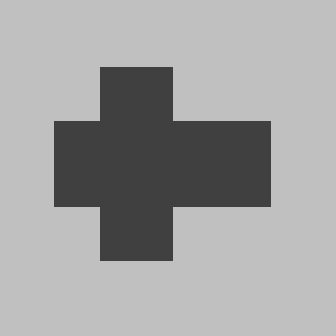

図A-5　cross の 10回膨張　８近傍処理


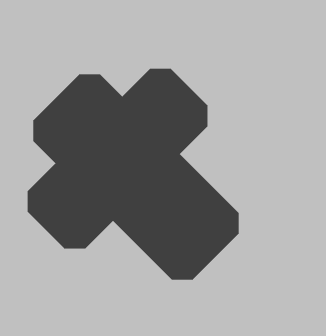

図A-6　45度回転画像 の 10回膨張　８近傍処理


In [4]:
繰り返し回数 = 10 #@param {type:"slider", min:1, max:30, step:1}
neiborhood8 = np.ones((3,3),np.uint8)
dilation8 = cv2.erode(bw2,neiborhood8,iterations = 繰り返し回数 )
dilation8r45 = cv2.erode(img2,neiborhood8,iterations = 繰り返し回数 )
cv2_imshow(128*(dilation8/255)+64)
print("図A-5　cross の {}回膨張　８近傍処理".format(繰り返し回数 ))
cv2_imshow(128*(dilation8r45/255)+64)
print("図A-6　45度回転画像 の {}回膨張　８近傍処理".format(繰り返し回数))

# 8近傍膨張　極端な例

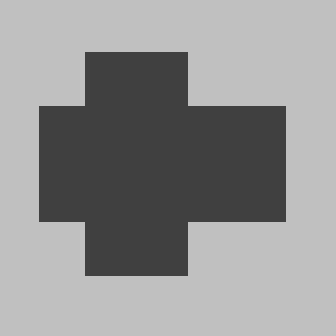

図A-7　cross の 25回膨張 ８近傍処理


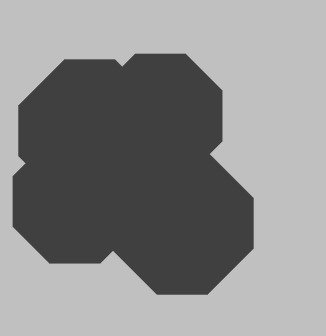

図A-8　45度回転画像 の 25回膨張　８近傍処理


In [5]:
itt = 25 #@param {type:"slider", min:1, max:30, step:1}
neiborhood8 = np.ones((3,3),np.uint8)
dilation8 = cv2.erode(bw2,neiborhood8,iterations = itt)
dilation8r45 = cv2.erode(img2,neiborhood8,iterations = itt)
cv2_imshow(128*(dilation8/255)+64)
print("図A-7　cross の {}回膨張 ８近傍処理".format(itt))
cv2_imshow(128*(dilation8r45/255)+64)
print("図A-8　45度回転画像 の {}回膨張　８近傍処理".format(itt))

# 徐々に膨張回数を増やして変化の様子を観測してみる

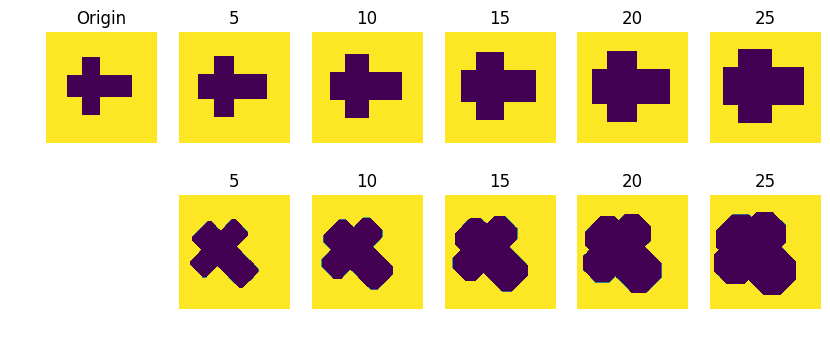

In [6]:
plt.figure(figsize=(10, 4), dpi=100)
neiborhood8 = np.ones((3,3),np.uint8)
plt.subplot(2,6,1)
plt.imshow(bw2)
plt.title("Origin")
plt.axis('off')
for i in range(1, 6):
    dilation8 = cv2.erode(bw2,neiborhood8,iterations = i*5 )
    plt.subplot(2, 6, i+1)
    plt.title(str(5*i))
    plt.imshow(dilation8)
    plt.axis('off')
    dilation8r45 = cv2.erode(img2,neiborhood8,iterations = i*5)
    plt.subplot(2, 6, 6+i+1)
    plt.title(str(5*i))
    plt.imshow(dilation8r45)
    plt.axis('off')



 　　　　　　　　　　　　　図A-9　膨張回数を段階的に増やしていった場合の結果観察（　８近傍処理 )


# ４近傍膨張

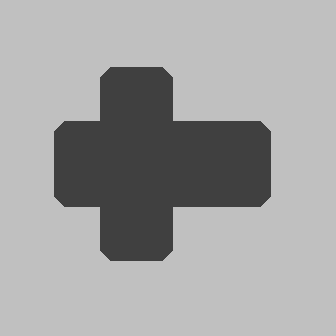

図A-10　cross の 10回膨張　４近傍処理


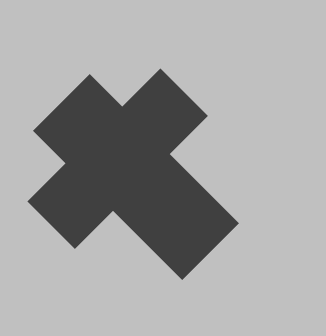

図A-11　45度回転画像 の 10回膨張　４近傍処理


In [7]:
itt = 10 #@param {type:"slider", min:1, max:30, step:1}
neiborhood4 = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]],np.uint8)
dilation4 = cv2.erode(bw2,neiborhood4,iterations = itt)
dilation4r45 = cv2.erode(img2,neiborhood4,iterations = itt)
cv2_imshow(128*(dilation4/255)+64)
print("図A-10　cross の {}回膨張　４近傍処理".format(itt))
cv2_imshow(128*(dilation4r45/255)+64)
print("図A-11　45度回転画像 の {}回膨張　４近傍処理".format(itt))

# ４近傍膨張　極端な例

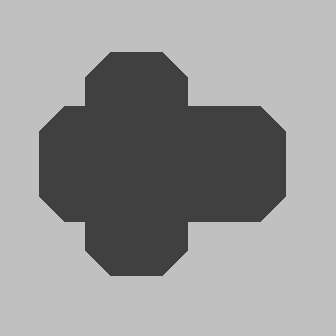

図A-12　cross の 25回膨張　４近傍処理


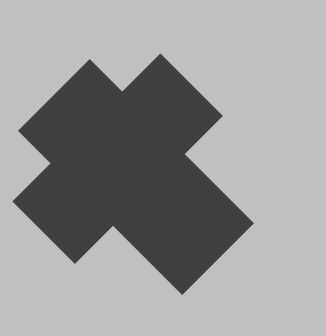

図A-13　45度回転画像 の 25回膨張　４近傍処理


In [8]:
itt = 25 #@param {type:"slider", min:1, max:30, step:1}
neiborhood4 = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]],np.uint8)
dilation4 = cv2.erode(bw2,neiborhood4,iterations = itt)
dilation4r45 = cv2.erode(img2,neiborhood4,iterations = itt)
cv2_imshow(128*(dilation4/255)+64)
print("図A-12　cross の {}回膨張　４近傍処理".format(itt))
cv2_imshow(128*(dilation4r45/255)+64)
print("図A-13　45度回転画像 の {}回膨張　４近傍処理".format(itt))

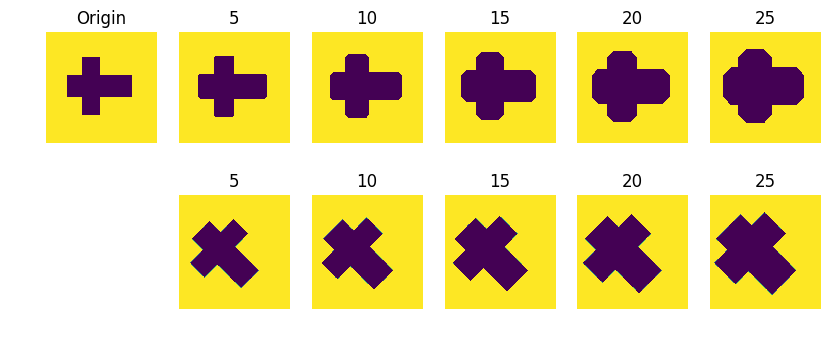

In [9]:
plt.figure(figsize=(10, 4), dpi=100)
plt.subplot(2,6,1)
plt.imshow(bw2)
plt.title("Origin")
plt.axis('off')
for i in range(1, 6):
    dilation4 = cv2.erode(bw2,neiborhood4,iterations = i*5 )
    plt.subplot(2, 6, i+1)
    plt.title(str(5*i))
    plt.imshow(dilation4)
    plt.axis('off')
    dilation4r45 = cv2.erode(img2,neiborhood4,iterations = i*5)
    plt.subplot(2, 6, 6+i+1)
    plt.title(str(5*i))
    plt.imshow(dilation4r45)
    plt.axis('off')

 　　　　　　　　　　　　　図A-14　膨張回数を段階的に増やしていった場合の結果観察（　４近傍処理 )

# 8近傍収縮

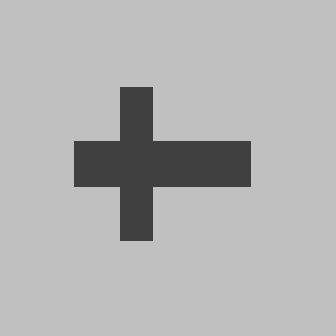

図A-15　cross の 10回収縮　８近傍処理


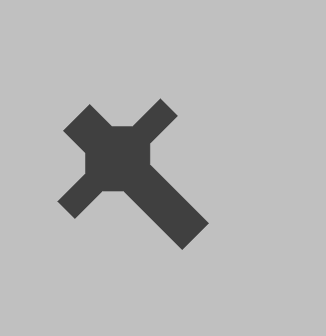

図A-16　45度回転画像 の 10回収縮　８近傍処理


In [10]:
itt = 10 #@param {type:"slider", min:1, max:30, step:1}
neiborhood8 = np.ones((3,3),np.uint8)
erosion8 = cv2.dilate(bw2,neiborhood8,iterations = itt)
erosion8r45 = cv2.dilate(img2,neiborhood8,iterations = itt)
cv2_imshow(128*(erosion8/255)+64)
print("図A-15　cross の {}回収縮　８近傍処理".format(itt))
cv2_imshow(128*(erosion8r45/255)+64)
print("図A-16　45度回転画像 の {}回収縮　８近傍処理".format(itt))

# ８近傍収縮　極端な例

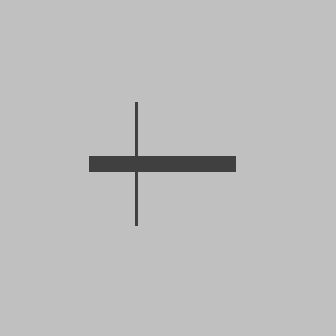

図A-17　cross の 25回収縮　８近傍処理


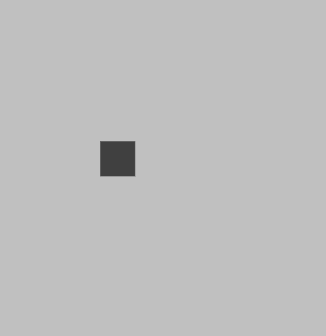

図A-18　45度回転画像 の 25回収縮　８近傍処理


In [11]:
itt = 25 #@param {type:"slider", min:1, max:30, step:1}
neiborhood8 = np.ones((3,3),np.uint8)
erosion8 = cv2.dilate(bw2,neiborhood8,iterations = itt)
erosion8r45 = cv2.dilate(img2,neiborhood8,iterations = itt)
cv2_imshow(128*(erosion8/255)+64)
print("図A-17　cross の {}回収縮　８近傍処理".format(itt))
cv2_imshow(128*(erosion8r45/255)+64)
print("図A-18　45度回転画像 の {}回収縮　８近傍処理".format(itt))

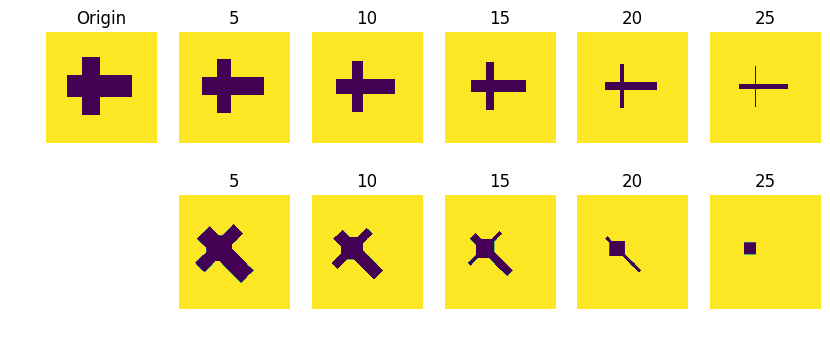

In [12]:
plt.figure(figsize=(10, 4), dpi=100)
neiborhood8 = np.ones((3,3),np.uint8)
plt.subplot(2,6,1)
plt.imshow(bw2)
plt.title("Origin")
plt.axis('off')
for i in range(1, 6):
    erosion8 = cv2.dilate(bw2,neiborhood8,iterations = i*5 )
    plt.subplot(2, 6, i+1)
    plt.title(str(5*i))
    plt.imshow(erosion8)
    plt.axis('off')
    erosion8r45 = cv2.dilate(img2,neiborhood8,iterations = i*5)
    plt.subplot(2, 6, 6+i+1)
    plt.title(str(5*i))
    plt.imshow(erosion8r45)
    plt.axis('off')



---

　　　　　　　　　図A-19　収縮回数を段階的に増やしていった場合の結果観察（　８近傍処理 )

# ４近傍収縮

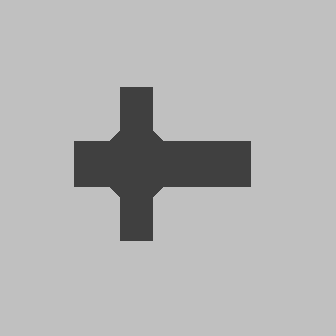

図A-20　cross の 10回収縮　４近傍処理


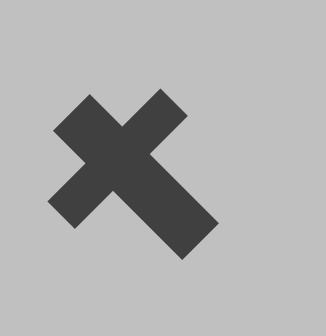

図A-21　45度回転画像 の 10回収縮　４近傍処理


In [13]:
itt = 10 #@param {type:"slider", min:1, max:30, step:1}
neiborhood4 = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]],np.uint8)
erosion4 = cv2.dilate(bw2,neiborhood4,iterations = itt)
erosion4r45 = cv2.dilate(img2,neiborhood4,iterations = itt)
cv2_imshow(128*(erosion4/255)+64)
print("図A-20　cross の {}回収縮　４近傍処理".format(itt))
cv2_imshow(128*(erosion4r45/255)+64)
print("図A-21　45度回転画像 の {}回収縮　４近傍処理".format(itt))

# ４近傍収縮　極端な例

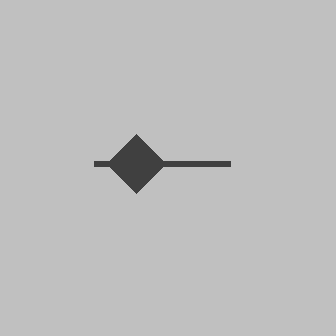

図A-22　cross の 30回収縮　４近傍処理


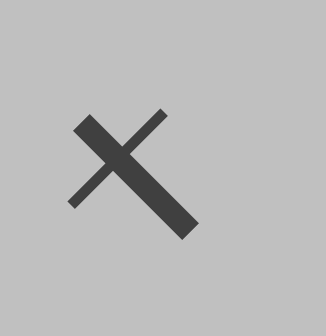

図A-23　45度回転画像 の 30回収縮　４近傍処理


In [14]:
itt = 30 #@param {type:"slider", min:1, max:30, step:1}
neiborhood4 = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]],np.uint8)
erosion4 = cv2.dilate(bw2,neiborhood4,iterations = itt)
erosion4r45 = cv2.dilate(img2,neiborhood4,iterations = itt)
cv2_imshow(128*(erosion4/255)+64)
print("図A-22　cross の {}回収縮　４近傍処理".format(itt))
cv2_imshow(128*(erosion4r45/255)+64)
print("図A-23　45度回転画像 の {}回収縮　４近傍処理".format(itt))

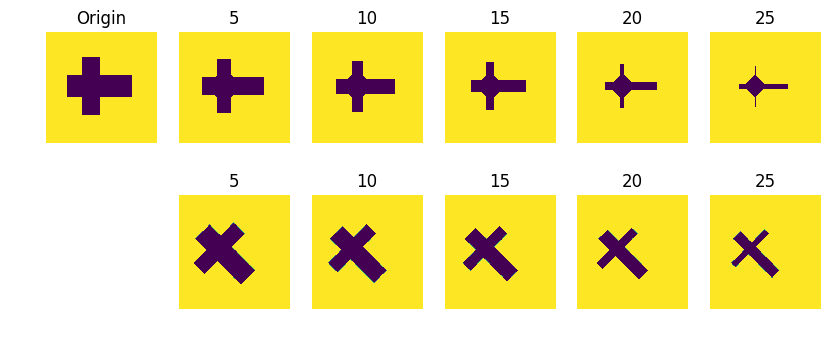

In [15]:
plt.figure(figsize=(10, 4), dpi=100)
neiborhood4 = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]],np.uint8)
plt.subplot(2,6,1)
plt.imshow(bw2)
plt.title("Origin")
plt.axis('off')
for i in range(1, 6):
    erosion4 = cv2.dilate(bw2,neiborhood4,iterations = i*5 )
    plt.subplot(2, 6, i+1)
    plt.title(str(5*i))
    plt.imshow(erosion4)
    plt.axis('off')
    erosion4r45 = cv2.dilate(img2,neiborhood4,iterations = i*5)
    plt.subplot(2, 6, 6+i+1)
    plt.title(str(5*i))
    plt.imshow(erosion4r45)
    plt.axis('off')

　　　　　　　　　　　　　図A-24　収縮回数を段階的に増やしていった場合の結果観察（４近傍処理 )

# 円ならどうなるか？

Saving circle.png to circle.png


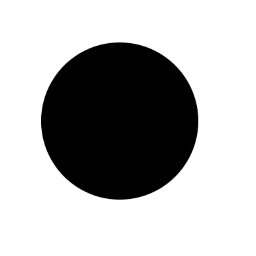

図A-25　ある円の画像


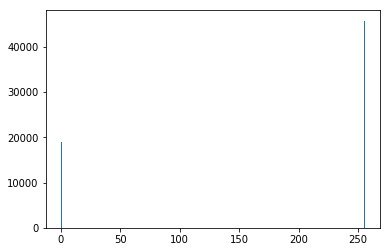

図A-26　上の画像のヒストグラム


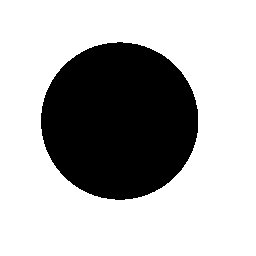

図A-27　円の画像を判別分析法によるしきい値 127.0 で２階調化した画像


In [17]:
filenameC = list(files.upload())[0]
imgC = cv2.imread(filenameC,1) # カラーで読み込み
gryC = cv2.imread(filenameC,0) # グレイで読み込み
cv2_imshow(imgC)
print("図A-25　ある円の画像")
histC = cv2.calcHist([gryC],[0],None,[256],[0,256])
plt.hist(gryC.ravel(),256,[0,256]); plt.show()
print("図A-26　上の画像のヒストグラム")
# ２階調化
retC, bwC = cv2.threshold(gryC,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2_imshow(bwC)
print("図A-27　円の画像を判別分析法によるしきい値 {} で２階調化した画像".format(retC))

↓図A-27　円の膨張　８近傍膨張


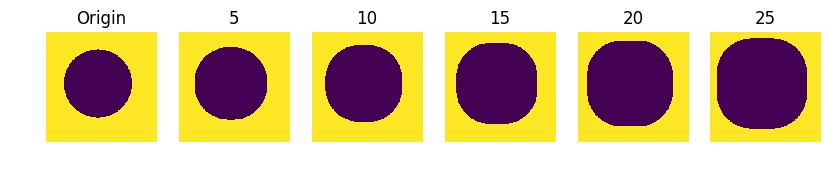

In [18]:
print("↓図A-27　円の膨張　８近傍膨張".format(retC))

plt.figure(figsize=(10, 4), dpi=100)
neiborhood8 = np.ones((3,3),np.uint8)
plt.subplot(1,6,1)
plt.imshow(bwC)
plt.title("Origin")
plt.axis('off')
for i in range(1, 6):
    dilate8 = cv2.erode(bwC,neiborhood8,iterations = i*5 )
    plt.subplot(1, 6, i+1)
    plt.title(str(5*i))
    plt.imshow(dilate8)
    plt.axis('off')

↓図A-28円の膨張　４近傍膨張


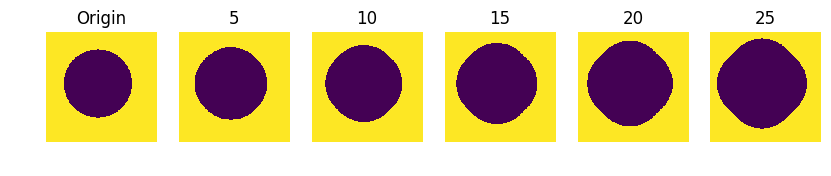

In [19]:
print("↓図A-28円の膨張　４近傍膨張".format(retC))
plt.figure(figsize=(10, 4), dpi=100)
neiborhood4 = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]],np.uint8)
plt.subplot(1,6,1)
plt.imshow(bwC)
plt.title("Origin")
plt.axis('off')
for i in range(1, 6):
    dilate4 = cv2.erode(bwC,neiborhood4,iterations = i*5 )
    plt.subplot(1, 6, i+1)
    plt.title(str(5*i))
    plt.imshow(dilate4)
    plt.axis('off')

↓図A-29　円の膨張　８近傍収縮


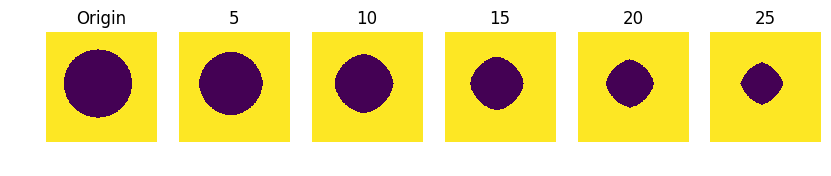

In [20]:
print("↓図A-29　円の膨張　８近傍収縮".format(retC))

plt.figure(figsize=(10, 4), dpi=100)
neiborhood8 = np.ones((3,3),np.uint8)
plt.subplot(1,6,1)
plt.imshow(bwC)
plt.title("Origin")
plt.axis('off')
for i in range(1, 6):
    erosion8 = cv2.dilate(bwC,neiborhood8,iterations = i*5 )
    plt.subplot(1, 6, i+1)
    plt.title(str(5*i))
    plt.imshow(erosion8)
    plt.axis('off')

↓図A-30　円の膨張　4近傍収縮


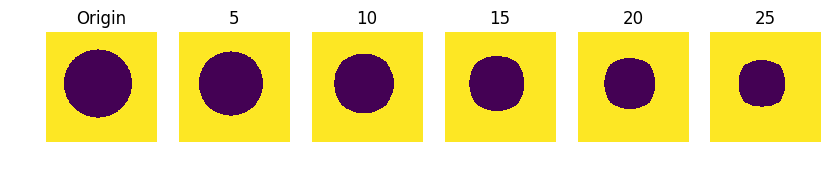

In [21]:
print("↓図A-30　円の膨張　4近傍収縮".format(retC))

plt.figure(figsize=(10, 4), dpi=100)
neiborhood4 = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]],np.uint8)
plt.subplot(1,6,1)
plt.imshow(bwC)
plt.title("Origin")
plt.axis('off')
for i in range(1, 6):
    erosion4 = cv2.dilate(bwC,neiborhood4,iterations = i*5 )
    plt.subplot(1, 6, i+1)
    plt.title(str(5*i))
    plt.imshow(erosion4)
    plt.axis('off')